# Data-driven Approach to decide where to live in London

## 1. Aims, objectives, and background

### 1.1	Introduction

Thousands of people move homes every year in London, “24,970 people moved to a new home in the capital in the first half of the year (2021) compared to 9,440 in the same six months the year before (2020)” [1]. There are many factors involved in the decision-making process , one of the most important factors for people moving to a borough in London is the crime rate in the area, “Important factor to consider when you decide where to live is the safety of an area” [2]. Many people make decisions based on intuition, but this project takes a scientific data-driven approach to make an informed decision about living in a London borough based on the crime rate in the area. Data-driven decision making is defined as “the process of using data to inform your decision-making process and validate a course of action before committing to it.” [3]

### 1.2	Aims and objectives

For this project the following research questions are explored:
- Is it possible to get access to reliable and consistent data about different crimes in each London borough?
- Using data to answer the following questions:
    1. Can all London boroughs be compared to each other for a specific crime over a period of time?
    2. Since population of each London borough is different so can all London boroughs be compared to each other for a specific crime per person (per capita crime) over a period of time?
    3. How different categories of crimes compare to each other in a specific London borough over a period of time? 
    4. And more importantly, can the trend of any given crime be compared to the trend of another crime in a specific London borough over a period of time?

For this project, the aims are as follows:
1.	Since credibility of organization that provides data is critical for the decision-making process so finding a reliable organization that can as data source to provides consistent data. 
2.	Taking into consideration constraints on time and resource, decide on how much data is required to sufficiently explore the above questions.
3.	Collect the data and store in a form which allows for data cleaning and analysis.
4.	Clean and transform the data such that it is suitable to create visualizations.
5.	Use visualisations to carry out exploratory data analysis, resulting in clear decision making.

### 1.3	Project Background

Literature review of research papers showed that there is lot of research in crime prevention and impact of crime on different aspects of human life, but no research could be found that focuses on using crime data to develop a data-driven decision-making approach to choose where to live so it makes perfect sense to work in this area of research. Further as the following screenshot shows, ‘Your area’ tool provided on https://www.police.uk/ does not show many important matrices that are covered by this project, that is, overall per capita comparison for a specific crime among different boroughs, trend of a list of crimes in any specific borough. This means that the project brings additional insight into data that is not available on the official police website. 
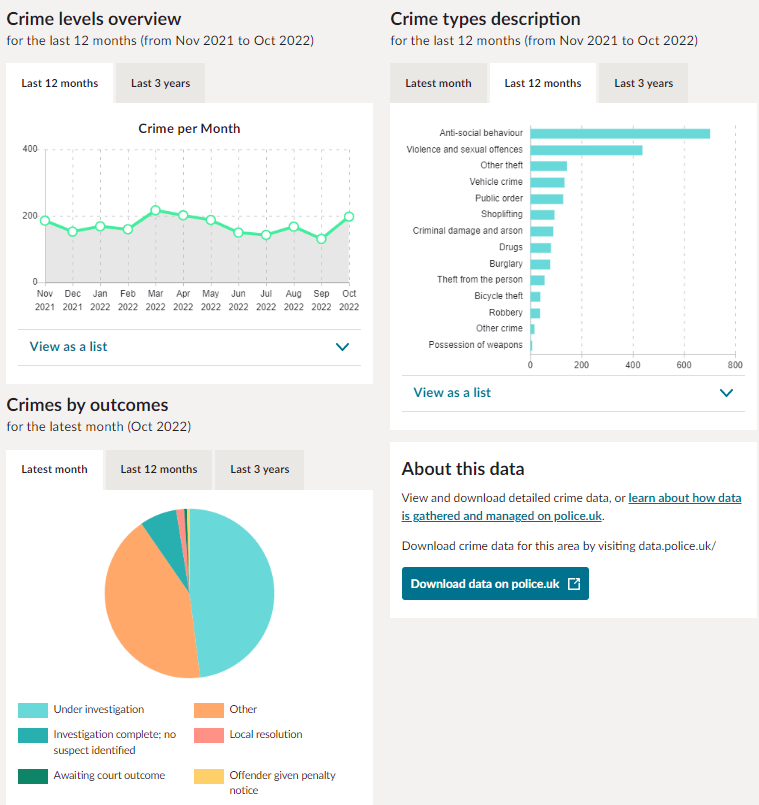

#### 1.3.1	Scope of Work
Scope of the project is limited to the analysis of the following:
1. Overall comparison of specific category of crimes in all London boroughs using Bar graph.
2. Overall comparison of specific category of crimes per person/capita in all London boroughs using Bar graph.
2. Overall comparison of different crimes within a specific borough using Bar graph.
3. Trend analysis of any given crime within a specific borough using Line graph.

#### 1.3.2	Data Processing Pipeline
Following are the stages of data processing pipeline:
1.	Reading/ data from CSV downloaded from selected data source.
2.	Cleaning and extracting/restructuring data (Understanding, cleaning and reshaping data using Pandas)
3.	Data plotting (Using Matplotlib to visualize the data)

#### 1.3.3	Evaluation Criteria
The evaluation criteria to evaluate aims and objectives is as follows:
1.	Data source is found that is credible, reliable, and consistent. 
2.	Two years of data with data points for each month is used to carry out data analysis.
3.	Required Dataframes in Pandas are created that can be used for exploratory data analysis.
4.	Visualizations are created for the following matrices:<br>
    a.	Overall crime comparison between boroughs for specific crime per person.<br>
    b.	Within borough, comparison between different crimes.<br>
    c.	Specific crime trend in any specific borough.<br>  

### 1.4	Data

#### 1.4.1	Data requirements

For effective exploratory data analysis to answer the questions mentioned above, there are following requirements:
1.	Crime rate data is needed to be available for each London borough.
2.	Crime rate data for each borough is required to be available for different categories of crime.
3.	Crime rate data for each category of crime in each borough is needed to be available for more than a year to check trends.
  
#### 1.4.2	Choice of Data Source

In order to perform a meaningful data analysis on crimes in London, the following organizations have been considered as data source:

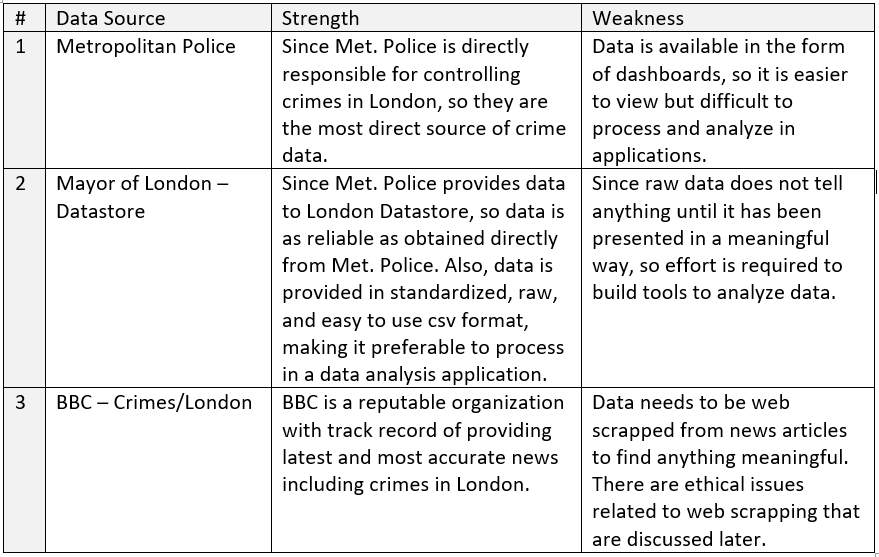

In [1]:
# To create interactive graph window
# %matplotlib notebook

# To create graph inline
%matplotlib inline

#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat

#Read CSV file that contains crime figures for each London borough
df = pd.read_csv("Crime.csv")
#Remove rows that does not have population data
df = df[(df["LookUp_BoroughName"] != "Aviation Security (SO18)") & (df["LookUp_BoroughName"] != "London Heathrow and London City Airports")]
#Read CSV file that contains population figures for each London borough
population_df = pd.read_csv("Population.csv")
#Read population projection figures for year 2021 for each London borough
year = list(population_df["2021"])
#create condition to select data for only one London Borough, that is, 'Hounslow'
condition = df['LookUp_BoroughName']=='Hounslow'
#set condition to get DataFrame
resultDf = (df[condition])

Text(0, 0.5, 'London Boroughs')

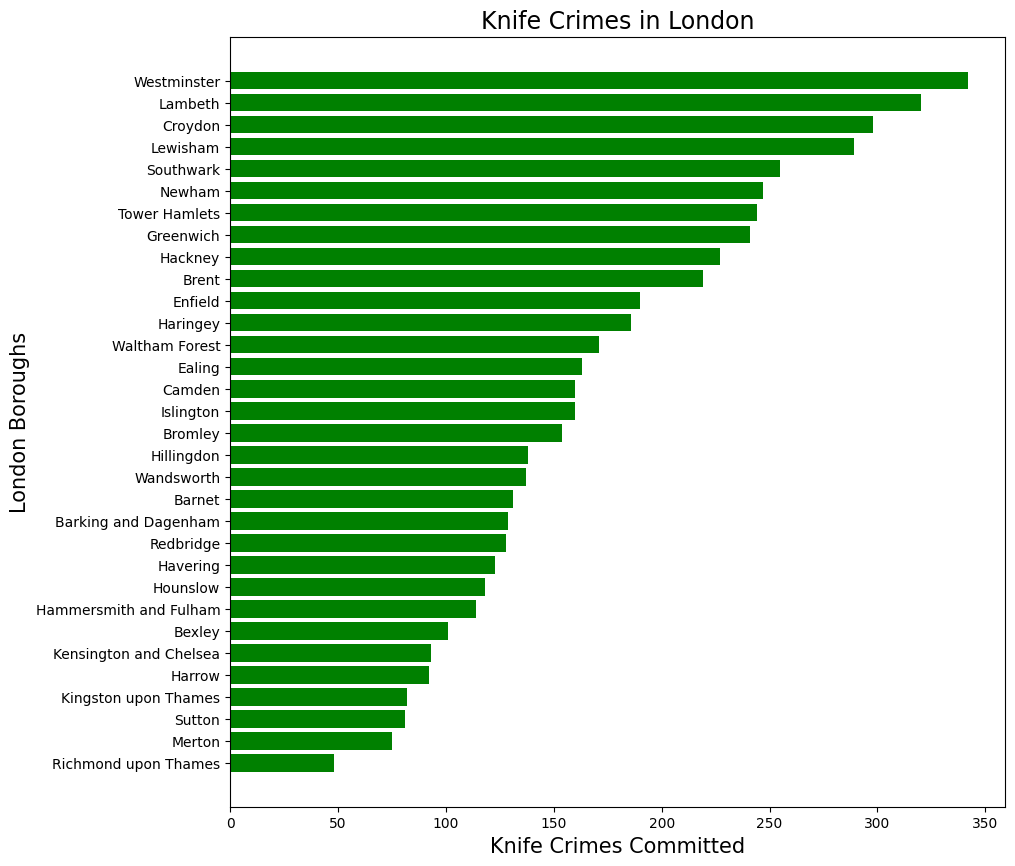

In [2]:
###########################################
#Show specific crime in all London boroughs
###########################################

#List all london boroughs
y_axis = df['LookUp_BoroughName'].unique()
#Create condition to select only crime named 'Possession of Article with Blade or Point'
conditionKnife = df["MinorText"]=="Possession of Article with Blade or Point"
#Use condition to get DataFrame containing "Possession of Article with Blade or Point" crime in all London boroughs
resultDfKnife = df[conditionKnife]
#Sum/add for all the months to get total number for each borough, then use it on X-axis of graph
x_axis = list(resultDfKnife.iloc[:,3:].sum(axis='columns'))
#Create new DataFrame so it can be sorted
dfSpecificCrimeAllBorough = pd.DataFrame(
    dict(
        names = y_axis,
        crimes = x_axis
    
    )
)
#Sort DataFrame
df_sorted = dfSpecificCrimeAllBorough.sort_values("crimes")
#Set graph size
plt.figure(figsize=(10, 10))
#Set sorted DataFrame and other parameters to draw bar graph
plt.barh("names","crimes", data = df_sorted, color = "green")
#Set title of graph
plt.title('Knife Crimes in London', fontsize = 17)
#Set label of X-axis
plt.xlabel('Knife Crimes Committed', fontsize = 15)
#Set label of Y-axis
plt.ylabel('London Boroughs', fontsize = 15)

Text(0, 0.5, 'London Boroughs')

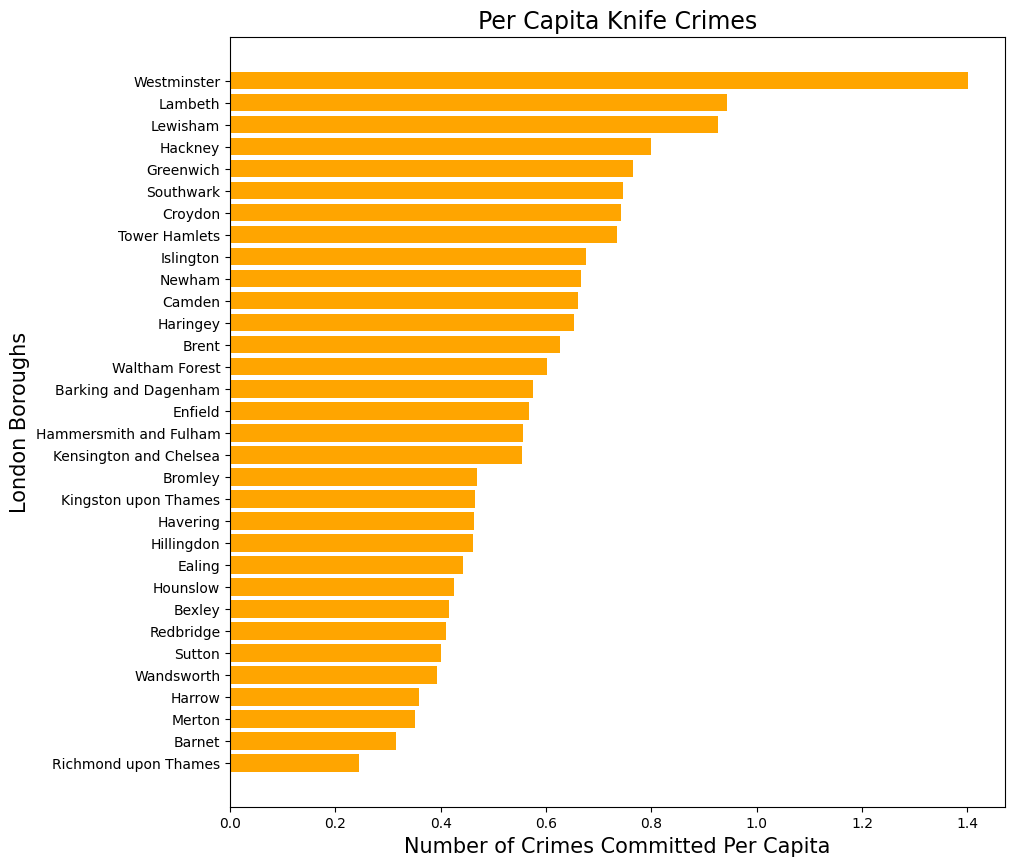

In [3]:
# create array to 
perCapitaCrime = []

# loop through list of crimes in each borough and population of each borough
for i in range(0,len(x_axis)):
    # divide no. of crime by population for each borough
    perCapitaCrime.append(x_axis[i]/year[i])
    #print(f"the per capita crime is {per_capita_name[i]}")

# create DataFrame using dictionary with name of boroughs as key and per capita crime as value)    
dfPerCapitaCrime = pd.DataFrame(
    dict(
        names = y_axis,
        crimes = perCapitaCrime
    
    )
)
#Sort DataFrame
df_sorted = dfPerCapitaCrime.sort_values("crimes")
plt.figure(figsize = (10,10))
#Set sorted DataFrame and other parameters to draw bar graph
plt.barh("names","crimes", data = df_sorted, color = "orange")
#Set title of graph
plt.title("Per Capita Knife Crimes", fontsize = 17)
#Set label for X-axis
plt.xlabel("Number of Crimes Committed Per Capita", fontsize = 15)
#Set label of Y-axis
plt.ylabel('London Boroughs', fontsize = 15)

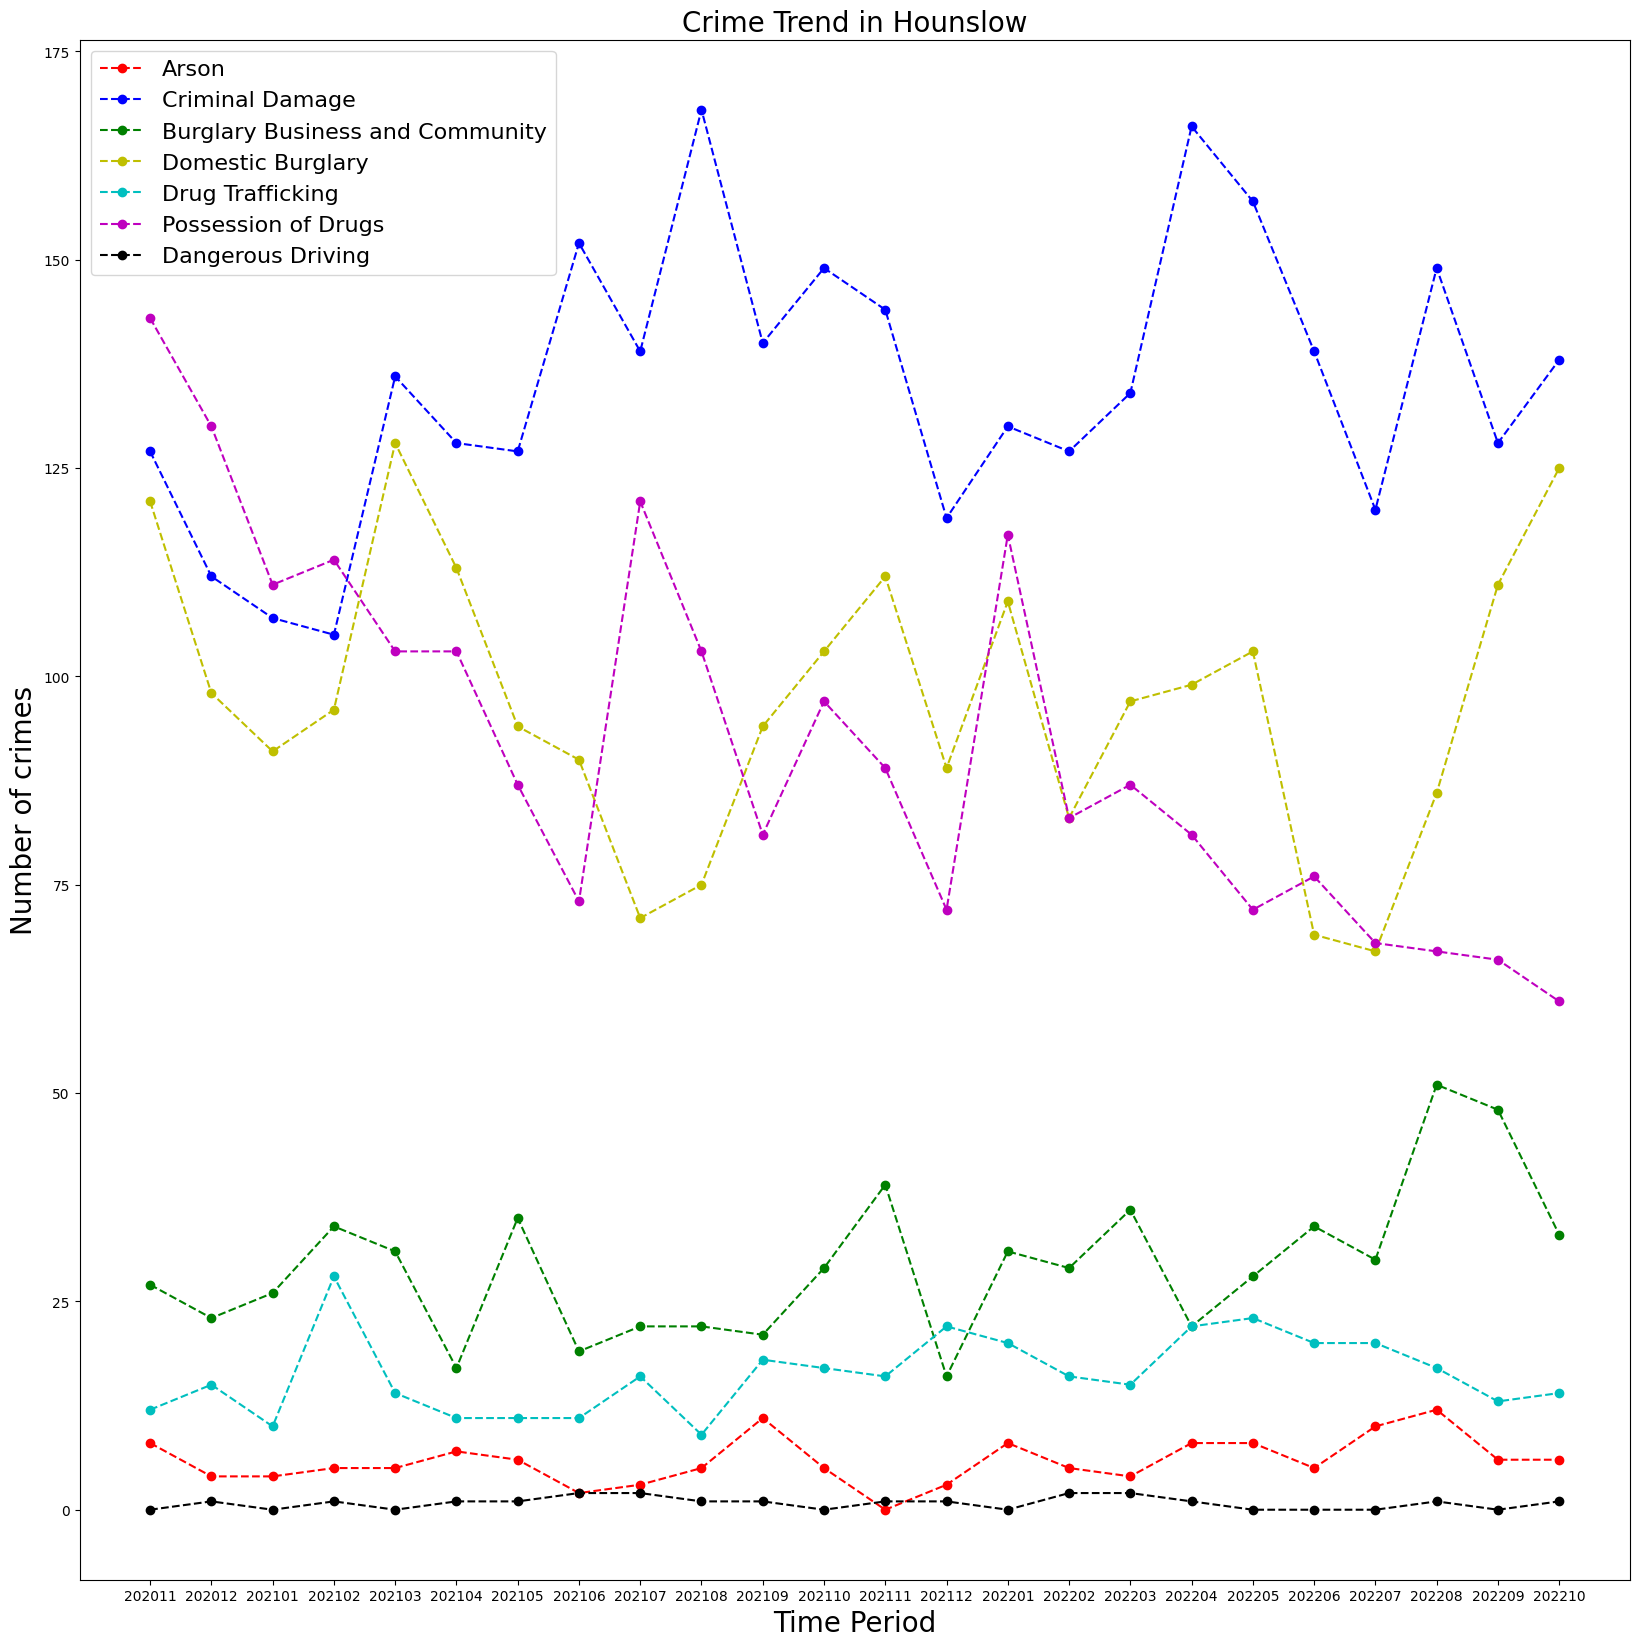

In [4]:
#########################################################
#Show trend of multiple crimes in specific London borough
#########################################################

#Select months from columns of DataFrame to show on X-axis
x_axis = df.columns.values[3:27]
#Set graph size
plt.figure(figsize=(20, 20))
#Select row containing crime named 'Arson' and show it on Y-axis
y_axis = resultDf.iloc[0][3:27]
#Set x-axis and y-axis and label 'Arson'
plt.plot(x_axis,y_axis,"--ro", label = "Arson")
#Select row containing crime named 'Criminal Damage' and show it on Y-axis
y_axis = resultDf.iloc[1][3:27]
#Set x-axis and y-axis and label 'Criminal Damage'
plt.plot(x_axis,y_axis,"--bo", label = "Criminal Damage")
#Select row containing crime named 'Burglary Business and Community' and show it on Y-axis
y_axis = resultDf.iloc[2][3:27]
#Set x-axis and y-axis and label 'Burglary Business and Community'
plt.plot(x_axis,y_axis,"--go", label = "Burglary Business and Community")
#Select row containing crime named 'Domestic Burglary' and show it on Y-axis
y_axis = resultDf.iloc[3][3:27]
#Set x-axis and y-axis and label 'Domestic Burglary'
plt.plot(x_axis,y_axis,"--yo", label = "Domestic Burglary")
#Select row containing crime named 'Drug Trafficking' and show it on Y-axis
y_axis = resultDf.iloc[4][3:27]
#Set x-axis and y-axis and label 'Drug Trafficking'
plt.plot(x_axis,y_axis,"--co", label = "Drug Trafficking")
#Select row containing crime named 'Possession of Drugs' and show it on Y-axis
y_axis = resultDf.iloc[5][3:27]
#Set x-axis and y-axis and label 'Possession of Drugs'
plt.plot(x_axis,y_axis,"--mo", label = "Possession of Drugs")
#Select row containing crime named 'Dangerous Driving' and show it on Y-axis
y_axis = resultDf.iloc[6][3:27]
#Set x-axis and y-axis and label 'Dangerous Driving'
plt.plot(x_axis,y_axis,"--ko", label = "Dangerous Driving")
#Set title of graph
plt.title("Crime Trend in Hounslow", fontsize = 20)
#Set label of X-axis
plt.xlabel("Time Period", fontsize = 20)
#Set label of Y-axis
plt.ylabel("Number of crimes", fontsize = 20)
#Set graph lagend
plt.legend(prop={"size":16})
#Show graph
plt.show()

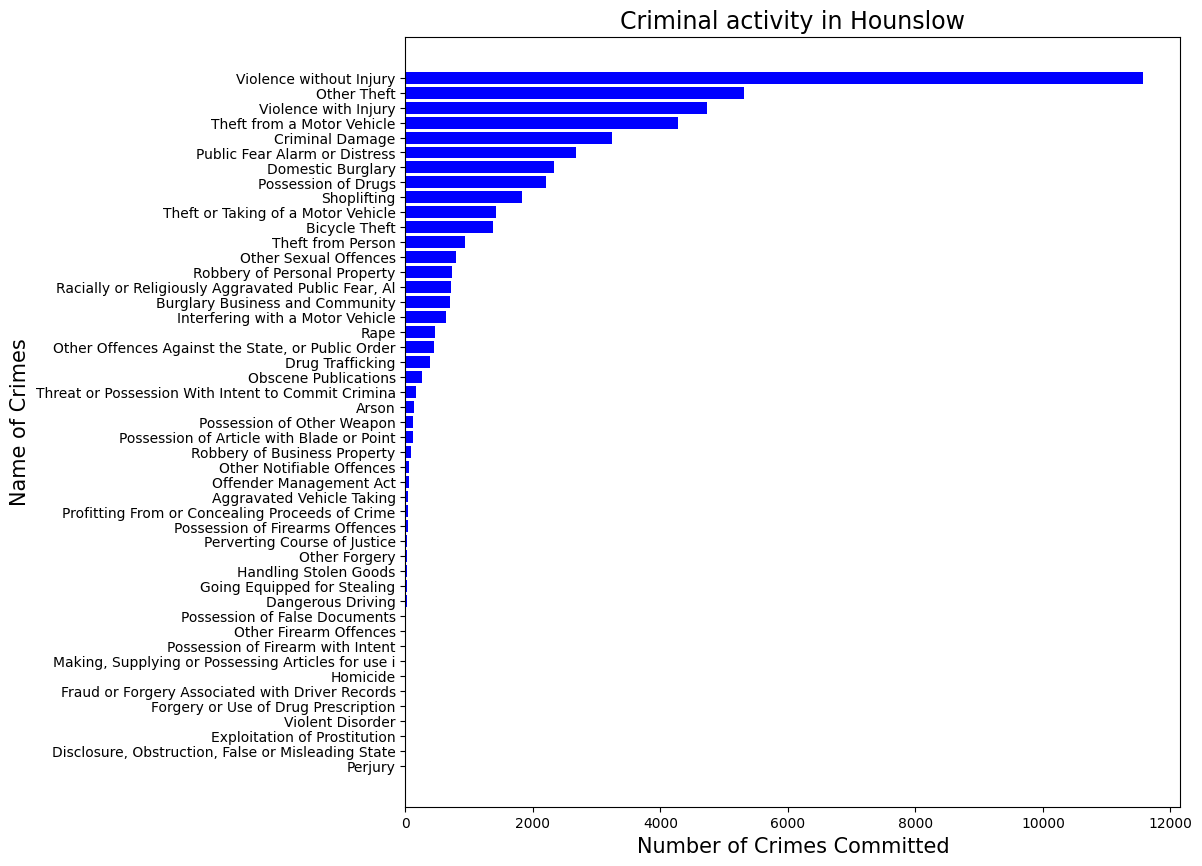

In [5]:
#########################################################
#show all crimes in specific london borough
#########################################################

#Select all the crimes and sum/add for all the months
x_axis = list(resultDf.iloc[:,3:27].sum(axis='columns'))
#Select list of all crimes
y_axis = list(resultDf["MinorText"])
#Create new DataFrame so it can be sorted
dfTotalCrimesInBorough = pd.DataFrame(
    dict(
        namesOfCrimes = y_axis,
        numberOfcrimes = x_axis
    
    )
)
#Sort DataFrame
df_sorted = dfTotalCrimesInBorough.sort_values("numberOfcrimes")
#Set graph size
plt.figure(figsize=(10, 10))
#Set sorted DataFrame and other parameters to draw bar graph
plt.barh("namesOfCrimes","numberOfcrimes", data = df_sorted, color = "blue")
#Set title of graph
plt.title('Criminal activity in Hounslow', fontsize = 17)
#Set label for X-axis
plt.xlabel('Number of Crimes Committed', fontsize = 15)
#Set label for Y-axis
plt.ylabel('Name of Crimes', fontsize = 15)
#Show graph
plt.show()